## 1

For a very wide, center-cracked panel with $R=0$ we have

$$\Delta K = \sigma \sqrt{\pi a} - 0 = 3.4a^{-1} \sqrt{\pi a}$$

Substituting this expression into the Paris equation gives

$$\frac{da}{dN} = 10^{-9}\left(3.4a^{-1} \sqrt{\pi a} \right)^4$$

Carrying through the exponent and simplifying gives

$$\frac{da}{dN} = 10^{-9}(133.6)a^{-2} \pi^2 $$

We bring $a^2$ to the left-hand side and integrate from $a=1$ to $a=4$ to find $N_f$

$$a^2 da = 10^{-9}(133.6)\pi^2 dN$$

After integration and solving for $N_f$

$$ N_f = \frac{64-1}{3 (10^{-9}) (133.6) (\pi^2)}$$

In [2]:
import numpy as np
(64-1)/(3*1e-9*133.6*np.pi**2)

15926233.955756685

We find $N_f = 15.9$ million cycles.

## 2

For a constant stress we can follow the same procedure as in problem 1 and find, before integration:

$$a^{-2} da = 81(10^{-9})\pi^2 1.122^4 $$

And after integrating

$$-a_N^{-1} +a_0^{-1} = 81(10^{-9}) \pi^2 1.122^4 N_f$$

We can substitute known values ($N_f = 50000$ and $a_0 = 0.5$) and solve for $a_N$

In [59]:
an = 1/(1/.5 - 81*1e-9*np.pi**2*1.122**4*50000)
an

0.516354768171825

Thus after 50000 cycles of $\sigma = 3 \text{ ksi}$ we find $a = 0.516 \text{ in}$

## 3

First we check to see at what crack length the stress intensity will exceed the fracture toughness. We use the larger "strong flick" bending moment in this case, since that is the most likely to cause failure.

In [60]:
import numpy as np
from scipy.optimize import fsolve
Kc = 70.0 #ksi sqrt(in)
M = 5e-3 #k-lb in
M2 = 3e-3 #k-lb in
W = 0.25 #in
t = 0.05 #in
sigma = 6*M/(t*W**2) #strong max tensile stress
sigma2 = 6*M2/(t*W**2) #regular max tensile stress
def beta(a,w):
    return np.sqrt(2*w/(np.pi*a)*np.tan(np.pi*a/(2*w)))*((.923+.199*(1-np.sin(np.pi*a/(2*w)))**4)/(np.cos(np.pi*a/(2*w))))
def K_opt(a,s,w):
    return (s*np.sqrt(np.pi*a)*beta(a,w) - Kc)**2
a0 = 0.01 #in, initial crack length
a_frac = fsolve(K_opt,0.2,args=(sigma,W))
print a_frac

[ 0.21815477]


We find that for $K \ge K_c$ would require $a = 0.218\text{ in}$, which we will use as the failure crack length for crack propagation analysis. We can also check for when the net-section bending stress would exceed the yield strength. In bending this is a complex problem, but we can approximate it by simply letting $W = W-a$ during the calculation of the inertia term. The yield strength of 7075-T6 aluminum in this case is $\sigma_{YS} = 68 \text{ ksi}$.

In [61]:
def sig_opt(a,s,w):
    return (68-6*M/(t*(w-a)**2))**2
a_yield = fsolve(sig_opt,0.2,args=(sigma,W))
print a_yield

[ 0.15606636]


We find that net-section yield will occur when $a=0.156 \text{ in}$ which is less than for fracture, so we will consider this crack length the failure length for our purposes.

In this problem, the flicks give a cyclic stress with a minimum bending moment of 0 (before the flick) and peacks of 3 in-lb for regular flicks and 5 in-lb for "strong flicks." Since $\sigma_{min}=0$, we have $R=0$, which gives $Z=1$ in the Boeing-Walker equation. We can use the numerical integration algorithm for a variable load to predict the number of cycles to failure for Dr. Smith's pen clip.

In [62]:
mt = 24.0
p = 3.5
def K(a,s,w):
    return s*np.sqrt(np.pi*a)*beta(a,w)
a = 0.01
KI = K(a,sigma,W)
N = 1
while KI < Kc and a < a_frac:
    if N%11 == 0:
        #remainder divided by 11=0, strong flick
        KI = K(a,sigma2,W)
        dadN = 1e-4*(KI/mt)**p
        dN = 1.0
        N = N + dN
        a = a+dN*dadN
    else:
        #weak flick
        #10 regular flicks
        KI = K(a,sigma,W)
        dadN = 1e-4*(KI/mt)**p
        dN = 1.0
        N = N + dN
        a = a+dN*dadN
print a
print N

0.219611493176
1047892.0


Thus we expect the part to eventually fail after 1.05 million cycles.

Note: we have neglected the effects of Region III in this problem, which leads to a non-conservative prediction. Also, it is interesting to note that neglecting net-section yield would give a very similar number of cycles to failure in this problem, 1046757 for net section yield and 1047892 for fracture. This will not always be the case.

## 4

Here we will compare the three retardation models we have learned, Wheeler, Willenborg, and Closure.

In [106]:
#load plotting libraries
from matplotlib import pyplot as plt
import seaborn as sb
sb.set(font_scale=1.5)
%matplotlib inline

def K(a,s):
    return np.sqrt(np.pi*a)*s

p = 3.5
q = 0.6
mt = 24.0
a_no = [0.25] #in
a_wil = [0.25]
a_whe = [0.25]
a_clo = [0.25]
s = 20.0 #ksi
R = 5.0/20.0
Z = (1-R)**q
N = 0
while N < 5000:
    #no overload, no retardation
    KI = K(a_no[-1],s)
    dadN = 1e-4*(KI*Z/mt)**p
    dN = 1.0
    N = N + dN
    a_no.append(a_no[-1]+dN*dadN)
    a_wil.append(a_wil[-1]+dN*dadN)
    a_whe.append(a_whe[-1]+dN*dadN)
    a_clo.append(a_clo[-1]+dN*dadN)

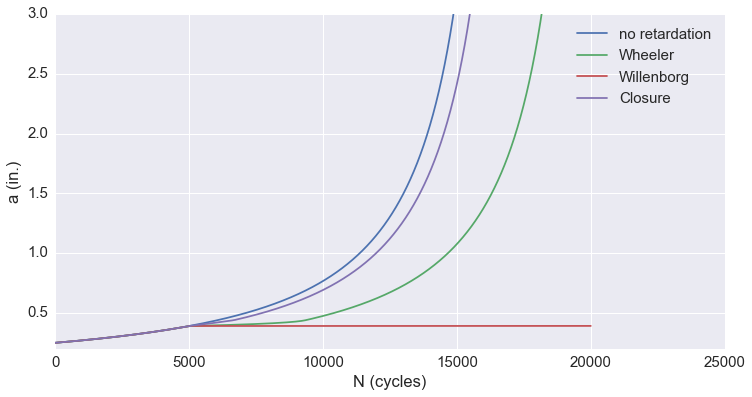

In [107]:
# overload
sys = 68.0 #yield strength
s = 40.0
R = 5.0/40.0
Z = (1-R)**q
KI = K(a_no[-1],s)
dadN = 1e-4*(KI*Z/mt)**p
N = N + 1
a_no.append(a_no[-1]+dN*dadN)
a_wil.append(a_wil[-1]+dN*dadN)
a_whe.append(a_whe[-1]+dN*dadN)
a_clo.append(a_clo[-1]+dN*dadN)
#overload plastic zone
r_ol = 1/(2*np.pi)*(KI/sys)**2
a_ol = a_no[-1]
K_ol = KI

#regular loading returns
s = 20.0
R = 5.0/20.0
Z = (1-R)**q
#no retardation
while N < 20000:
    KI = K(a_no[-1],s)
    dadN = 1e-4*(KI*Z/mt)**p
    dN = 1.0
    N = N + dN
    a_no.append(a_no[-1]+dN*dadN)

N = 5001
#wheeler retardation
m = 1.5
while N < 20000:
    KI = K(a_whe[-1],s)
    rpi = 1/(2*np.pi)*(KI/sys)**2
    if (a_whe[-1] + rpi) < (a_ol + r_ol):
        phi = (rpi/(a_ol+r_ol-a_whe[-1]))**m
    else:
        phi = 1.0
    dadN = phi*1e-4*(KI*Z/mt)**p
    dN = 1.0
    N = N + dN
    a_whe.append(a_whe[-1]+dN*dadN)

N = 5001
#willenborg retardation
Kth = 3.0
sol = 2.0
while N < 20000:
    Kmax = K(a_wil[-1],s)
    rpi = 1.0/(2.0*np.pi)*(Kmax/sys)**2.0
    if (a_wil[-1] + rpi) < (a_ol + r_ol):
        phi = (1.0-Kth/Kmax)/(sol-1.0)
        KI = Kmax-phi*(K_ol*np.sqrt(1.0-(a_wil[-1]-a_ol)/r_ol)-Kmax)
    else:
        KI = Kmax
    dadN = 1e-4*(KI*Z/mt)**p
    dN = 1.0
    N = N + dN
    a_wil.append(a_wil[-1]+dN*dadN)

N = 5001
#closure retardation
Cf0 = 0.3
Cf = (1.0-(1.0-Cf0)*(1.0+0.6*R)*(1.0-R))
Z_c = (1-Cf)**q
while N < 20000:
    KI = K(a_clo[-1],s)
    rpi = 1/(2*np.pi)*(KI/sys)**2
    if (a_clo[-1] + rpi) < (a_ol + r_ol):
        dadN = 1e-4*(KI*Z_c/mt)**p
    else:
        dadN = 1e-4*(KI*Z/mt)**p
    dN = 1.0
    N = N + dN
    a_clo.append(a_clo[-1]+dN*dadN)
    
plt.figure(figsize=(12,6))
plt.plot(np.linspace(0,len(a_no),len(a_no)),a_no,label='no retardation')
plt.plot(np.linspace(0,len(a_whe),len(a_whe)),a_whe,label='Wheeler')
plt.plot(np.linspace(0,len(a_wil),len(a_wil)),a_wil,label='Willenborg')
plt.plot(np.linspace(0,len(a_clo),len(a_clo)),a_clo,label='Closure')
plt.ylim([0.2,3])
plt.legend()
plt.xlabel('N (cycles)')
plt.ylabel('a (in.)')

For these conditions, we see that the Closure model predicts only moderate retardation. The Wheeler model predicts significat retardation in crack propagation, while the Willenborg model predicts that crack growth will stop entirely.